# Introduction to Pytroch

## tensors

In [1]:
import torch

In [2]:
torch.__version__

'1.2.0'

In [3]:
torch.tensor([[1, 2], [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [4]:
x = torch.tensor(5.1)
print(x, x.dtype)

tensor(5.1000) torch.float32


In [5]:
x = torch.tensor(3)
print(x, x.dtype)

tensor(3) torch.int64


In [6]:
x = torch.ones(3, 4, 5)
x.shape

torch.Size([3, 4, 5])

## torch.cuda

In [7]:
torch.cuda.is_available()

True

In [8]:
x = torch.ones(500, 500)

In [9]:
y = x.cuda()

In [10]:
%%timeit
x @ x

1.02 ms ± 88.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
y @ y

The slowest run took 4.87 times longer than the fastest. This could mean that an intermediate result is being cached.
14.8 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## torch.autograd

In [12]:
a = torch.tensor(2.5, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

In [13]:
c = a * (b ** 2)

In [14]:
c.backward(retain_graph=True)

In [15]:
a.grad, b.grad

(tensor(9.), tensor(15.))

In [16]:
a = torch.tensor(2.5, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a * (b ** 2).detach()
c.backward()
a.grad, b.grad

(tensor(9.), None)

In [17]:
x = torch.ones(4, 4, requires_grad=True)

In [18]:
z = x[0, 0] * x[0, 1]

In [19]:
z.backward()

In [20]:
x.grad

tensor([[1., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [21]:
x = torch.ones(2, requires_grad=True)
#x[0] = x[1]
(x[0] * x[1]).backward()

In [29]:
x = torch.ones(2, requires_grad=True)
with torch.no_grad():
    x[0] = x[1]
(x[0] * x[1]).backward()

In [22]:
x = torch.ones(4, 4, requires_grad=True)
z = x * x

s = torch.sum(z * torch.ones(4, 4))
s.backward(retain_graph=True)
x.grad

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [23]:
# equivalent to the previous cell
x = torch.ones(4, 4, requires_grad=True)
z = x * x

z.backward(torch.ones(4, 4), retain_graph=True)
x.grad

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

## torch.optim

In [24]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

optimizer = torch.optim.SGD([x, y], 0.1)

for _ in range(50):
    z = x ** 2 + x * y + (y - 2) ** 2

    print("{:8.3}\t{:8.3}\t{:8.3}".format(x.item(), y.item(), z.item()))
    
    optimizer.zero_grad()
    z.backward()
    optimizer.step()

     3.0	     3.0	    19.0
     2.1	     2.5	    9.91
    1.43	    2.19	    5.21
   0.925	    2.01	    2.71
   0.539	    1.91	    1.33
    0.24	    1.88	   0.523
 0.00406	    1.88	  0.0225
  -0.185	     1.9	  -0.307
  -0.338	    1.94	  -0.538
  -0.464	    1.99	  -0.706
   -0.57	    2.04	  -0.834
   -0.66	    2.09	  -0.933
  -0.736	    2.13	   -1.01
  -0.802	    2.18	   -1.07
   -0.86	    2.22	   -1.12
   -0.91	    2.27	   -1.16
  -0.955	     2.3	    -1.2
  -0.994	    2.34	   -1.22
   -1.03	    2.37	   -1.24
   -1.06	     2.4	   -1.26
   -1.09	    2.43	   -1.27
   -1.11	    2.45	   -1.29
   -1.14	    2.47	   -1.29
   -1.16	    2.49	    -1.3
   -1.17	    2.51	   -1.31
   -1.19	    2.52	   -1.31
    -1.2	    2.54	   -1.32
   -1.22	    2.55	   -1.32
   -1.23	    2.56	   -1.32
   -1.24	    2.57	   -1.32
   -1.25	    2.58	   -1.33
   -1.26	    2.59	   -1.33
   -1.26	     2.6	   -1.33
   -1.27	     2.6	   -1.33
   -1.28	    2.61	   -1.33
   -1.28	    2.62	   -1.33
   -1.29	    2.62	   -1.33
 

## torch.nn

In [25]:
from torch import nn

In [26]:
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weight = nn.Parameter(torch.randn(30))
    
    def forward(self, x):
        return (x * self.weight).sum()


teacher = Perceptron()
student = Perceptron()

optimizer = torch.optim.SGD(student.parameters(), lr=0.01)

for _ in range(200):
    x = torch.randn(30)
    y_t = teacher(x)
    y_s = student(x)

    loss = (y_t - y_s) ** 2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    Q = torch.dot(student.weight, teacher.weight) / (student.weight.norm() * teacher.weight.norm())
    print("{:8.3} \t{:8.3} \t{:8.3}".format(y_t.item(), y_s.item(), Q))

    2.23 	   -3.76 	   0.225
   -1.82 	   -5.56 	   0.222
  -0.449 	   -3.42 	   0.222
   -4.48 	    1.56 	   0.244
    4.82 	     8.6 	   0.234
    2.89 	     3.8 	   0.232
   0.426 	    -3.4 	   0.235
   -3.74 	    2.11 	   0.254
   -12.4 	   0.884 	   0.379
    4.61 	    -1.4 	   0.401
   -6.21 	    3.55 	    0.45
   0.594 	     2.1 	    0.45
   -2.86 	   -5.11 	   0.448
   0.729 	    2.37 	   0.448
   0.102 	  -0.358 	   0.448
    1.68 	   -1.93 	   0.455
   0.322 	    1.61 	   0.455
    3.26 	    1.04 	   0.459
   -9.59 	   -4.01 	   0.491
    3.13 	    0.94 	   0.496
    3.82 	   -4.65 	   0.528
   -3.37 	   -12.4 	   0.535
    -2.3 	    -9.0 	   0.542
   -5.44 	   0.217 	   0.565
   -5.34 	   -6.74 	   0.563
    3.74 	    7.97 	   0.562
    3.62 	    4.99 	   0.561
   -1.81 	   -9.33 	   0.576
   -2.35 	  -0.723 	   0.579
    4.82 	    6.16 	   0.577
     7.5 	    8.37 	   0.575
    2.76 	    -7.4 	   0.637
   -2.92 	  -0.201 	   0.644
     4.0 	    3.32 	   0.645
   -1.35 	    

In [27]:
import matplotlib.pyplot as plt

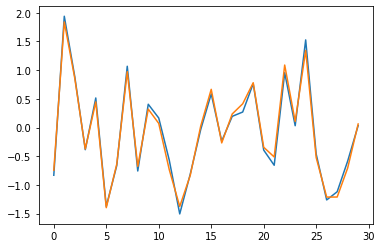

In [28]:
plt.plot(teacher.weight.detach().numpy())
plt.plot(student.weight.detach().numpy())